In [213]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [214]:
from sklearn.datasets import load_iris
data = load_iris()
iris = [[], [], []]
for i in range(len(data.target)):
    iris[data.target[i]].append(data.data[i])
iris = np.array(iris)

Проверим ,что все компоненты смеси встречаются равновероятно.

In [230]:
len(data.target)

150

In [231]:
for i in (0, 1, 2):
    print len(iris[i])

50
50
50


## Посчитаем матожидание,ковариацию и построим графики плотностей


a = ${\overline X}$



оценка ковариации 𝑖-ой и 𝑗-ой компонент : ${\overline {{X^{i}Y^{j}}}} - {\overline X ^ {i}}{\overline X ^ {j}}$


In [232]:
def build(coords, iris_type):
    
    # выбираем нужные столбцы
    col =  numpy.array([[type_[coords[0]], type_[coords[1]]] 
                        for type_ in iris[iris_type]])
    
    # считаем среднее по столбцам(то есть матожидание)
    a = (col[:,0].mean(), col[:,1].mean()) 
    
    # считаем ковариацию по формуле
    cov = [[((col[:,i] * col[:,j]).mean() - col[:,i].mean() * col[:,j].mean()) 
            for j in (0, 1)] for i in (0, 1)]
    
    # построение графиков
    fig = plt.figure(figsize = (5, 5))
    
    # выбираем точки
    grid = np.mgrid[np.min(col[:,0]) - 0.2:np.max(col[:,0]) + 0.2:0.05,
                    np.min(col[:,1]) - 0.2:np.max(col[:,1]) + 0.2:0.05]
    
    # считаем плотность
    density = np.array([[sps.multivariate_normal.pdf((grid[0, i, j], 
                                                      grid[1, i, j]),
                                                     mean= a, cov=cov)
                       for j in range(grid[0].shape[1])]
                      for i in range(grid[0].shape[0])])
    
    plt.pcolormesh(grid[0], grid[1], density, cmap='Greens')
    
    # рисуем указанные линии уровня
    CS = plt.contour(grid[0], grid[1], density, [0.2,0.3, 0.4, 0.6, 0.7]) 
    plt.clabel(CS, fontsize=14, inline=1, fmt='%1.1f')
    
    # наносим соответствующие проекции точек выборки
    plt.scatter(col[:,0], col[:,1])

    plt.xlim((np.min(grid[0]) - 0.2 , np.max(grid[0]) + 0.2 ))
    plt.ylim((np.min(grid[1]) - 0.2 , np.max(grid[1]) + 0.2))
    
    plt.title(r'coordinates - $' + str(coords) + r'$, iris_type - $' \
              + str(iris_type) + r'$')

    
   
    

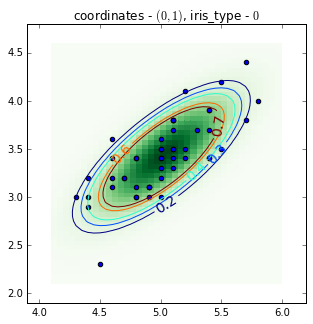

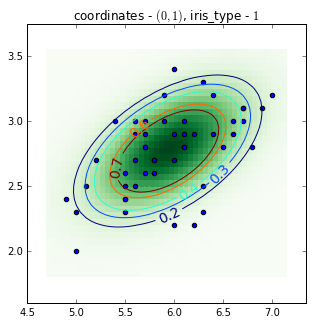

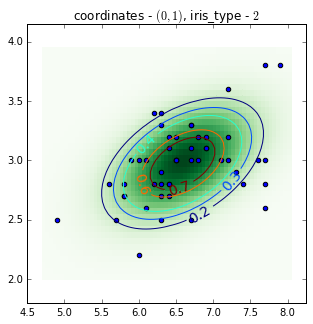

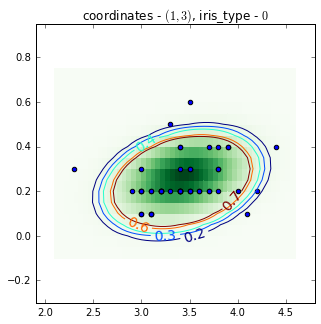

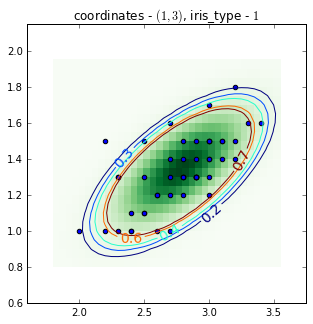

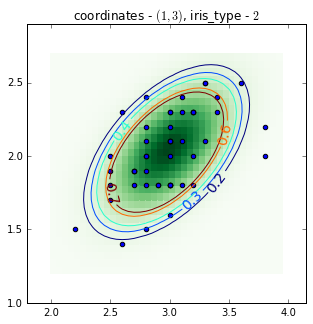

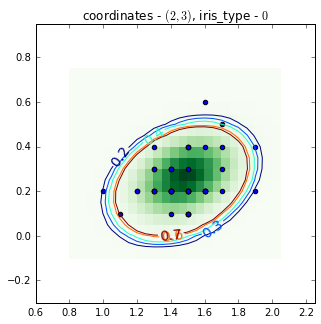

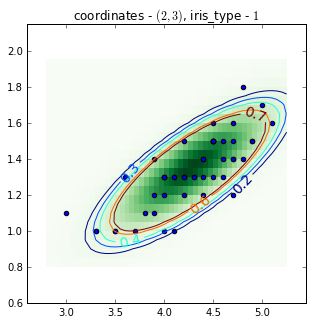

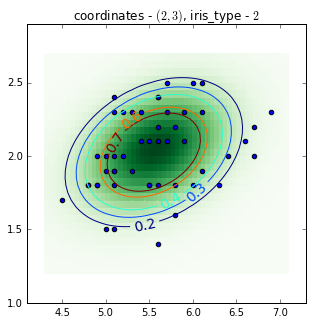

In [217]:
for coords in [(0, 1), (1, 3), (2, 3)]:
    for iris_type in [0,1,2]:
        build(coords, iris_type)